In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import tensorflow as tf 
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') 

In [3]:
gas = pd.read_csv('gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
gas.shape

(15039, 11)

In [6]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [8]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
gas.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

<AxesSubplot:>

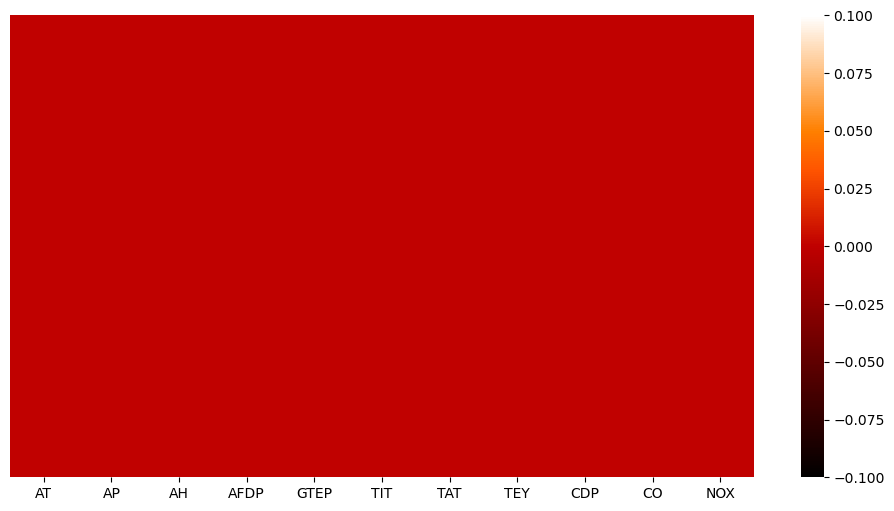

In [11]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(gas.isna(), cmap =('gist_heat'), yticklabels=False)

In [12]:
gas[gas.duplicated()].shape

(0, 11)

In [13]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [14]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

<AxesSubplot:title={'center':'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

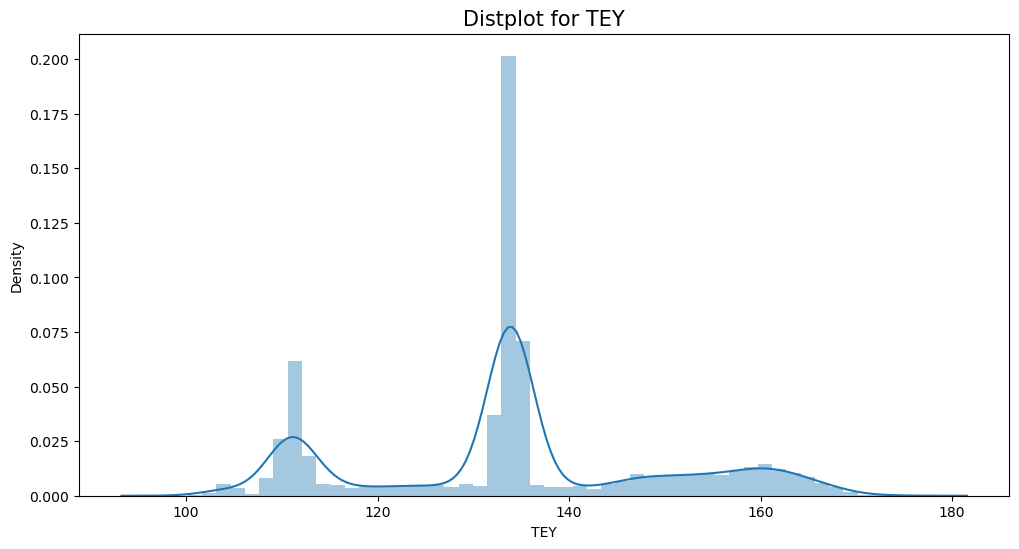

In [15]:
plt.title('Distplot for TEY', fontsize=15, y = 1.00)
sns.distplot(gas['TEY'])

<AxesSubplot:title={'center':'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

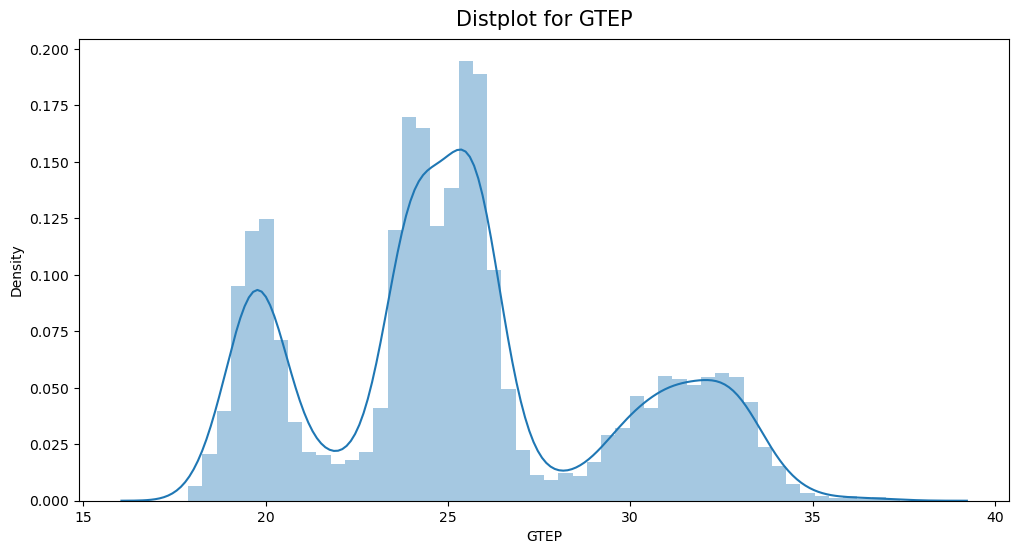

In [16]:
plt.title('Distplot for GTEP', fontsize=15, y = 1.01)
sns.distplot(gas['GTEP'])

<AxesSubplot:title={'center':'Distplot for GTEP'}, xlabel='TAT', ylabel='Density'>

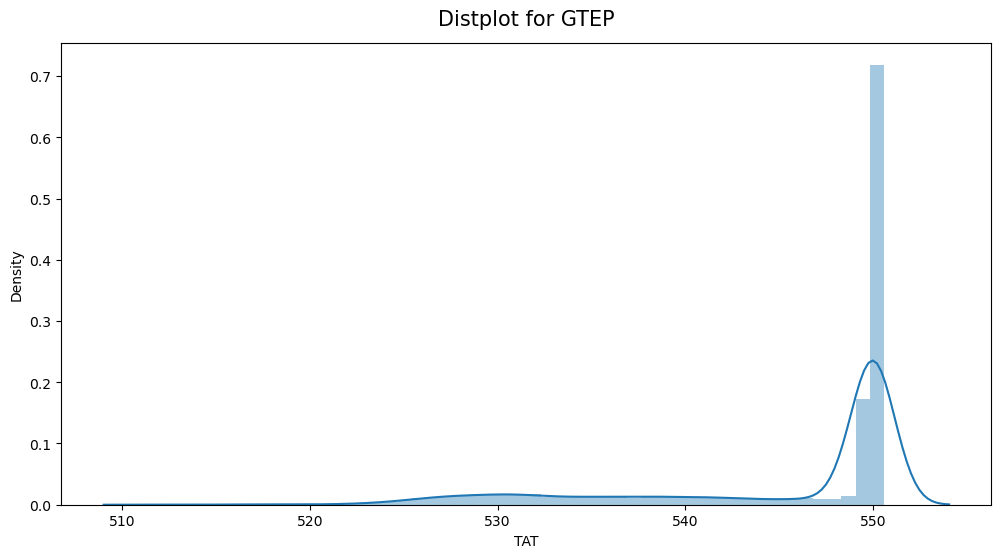

In [17]:
plt.title('Distplot for GTEP', fontsize=15, y = 1.02)
sns.distplot(gas['TAT'])

<AxesSubplot:title={'center':'Correlation Map'}>

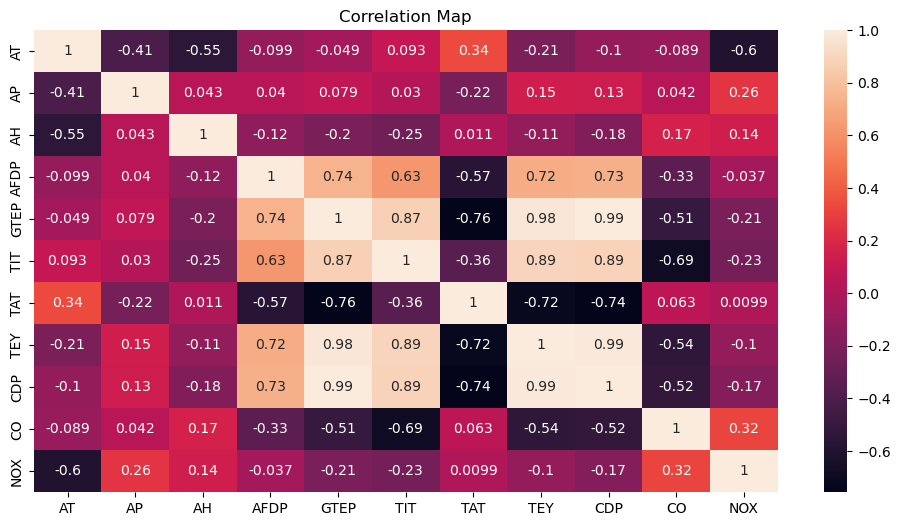

In [18]:
plt.title('Correlation Map')
sns.heatmap(gas.corr(), annot=True)

In [19]:
gas.shape

(15039, 11)

In [20]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [21]:
norm = MinMaxScaler()
std = StandardScaler()
gas_norm = pd.DataFrame(norm.fit_transform(gas), columns=gas.columns) 
gas_std = pd.DataFrame(std.fit_transform(gas), columns=gas.columns) 
print(gas_norm,gas_std)

             AT        AP        AH      AFDP      GTEP    TIT       TAT  \
0      0.184182  0.456050  0.951314  0.255758  0.091426  0.584  0.984015   
1      0.182020  0.466391  0.955881  0.255721  0.094755  0.585  0.984015   
2      0.185295  0.474664  0.939003  0.252571  0.097367  0.586  0.980608   
3      0.189922  0.482937  0.929126  0.252227  0.098033  0.588  0.983753   
4      0.199830  0.493278  0.927708  0.255323  0.096650  0.589  0.983491   
...         ...       ...       ...       ...       ...    ...       ...   
15034  0.247272  0.408480  0.975092  0.263380  0.065868  0.489  0.884696   
15035  0.214075  0.414685  0.984153  0.256826  0.078672  0.455  0.806342   
15036  0.195962  0.422958  0.989922  0.251593  0.084614  0.369  0.651730   
15037  0.188443  0.433299  0.982936  0.246451  0.076777  0.424  0.754455   
15038  0.186173  0.441572  0.961821  0.242631  0.073141  0.491  0.875262   

            TEY       CDP        CO       NOX  
0      0.195191  0.135340  0.071522  0.

In [22]:
temp = gas_std.sample(frac=1)          
temp_s = gas_std.sample(frac=0.1)

In [23]:
temp

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
8451,-1.226075,0.904878,0.867023,0.572510,0.696956,0.520427,-0.754612,0.818206,0.760223,-0.442759,0.232761
861,-1.580733,0.530495,0.536202,0.297046,-0.522323,-0.490025,0.339897,-0.313248,-0.511578,0.257546,2.762121
9099,-0.491332,1.232463,-0.216065,0.114850,-0.273867,0.157390,0.585240,-0.043493,-0.169833,-0.588412,0.377648
9720,-0.853752,-0.733048,0.597973,1.941938,1.514441,0.913717,-1.716915,1.453740,1.451872,-0.693212,-2.259255
4144,1.026478,-0.982637,0.820260,-0.907419,-1.221929,-1.458123,0.585240,-1.486397,-1.360050,1.063844,-2.153431
...,...,...,...,...,...,...,...,...,...,...,...
1536,-0.215522,0.405700,-0.376146,1.639770,0.918578,0.956071,-0.346554,0.914863,0.741187,-0.561942,0.485955
2753,0.255559,0.374502,0.739784,-1.052255,-1.460562,-1.778805,0.562359,-1.590635,-1.594830,1.167258,-0.310493
9563,-0.947229,-0.109076,0.693746,1.887609,1.725281,0.974223,-2.088107,1.717810,1.685746,-0.419057,-0.268564
14843,-0.656368,-1.263424,1.055162,-0.012489,-0.289680,0.048479,0.589054,-0.039703,-0.376512,-0.298812,0.321107


In [24]:
temp_s

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
4028,1.383486,-1.091832,0.445431,0.941769,1.210400,0.968172,-0.669441,0.745555,0.964182,-0.632928,-1.488594
9859,-0.473772,1.138867,-0.815065,0.208119,1.197702,0.980273,-1.538946,1.424680,1.440995,-0.288461,0.065143
508,-1.641545,-0.202672,-1.487363,1.905368,2.046094,0.974223,-2.404638,2.009675,1.931404,-0.626880,0.282617
2907,1.404478,0.234108,-1.716610,-0.048271,0.100374,0.472022,0.582698,-0.067500,0.011465,-0.019755,0.025221
6438,-0.158222,-0.046679,0.643793,-0.848880,-1.466552,-1.724350,0.580155,-1.543886,-1.508714,1.502701,-0.041540
...,...,...,...,...,...,...,...,...,...,...,...
14137,-1.113652,0.826881,0.458481,-1.131053,-1.324954,-1.337111,0.578884,-1.119985,-1.207760,0.621206,1.373328
8165,-1.461299,-0.187073,1.324357,0.527389,0.881920,0.556731,-1.045718,1.151767,0.898915,-0.578251,0.365137
10663,0.224928,-0.374264,0.790969,-0.726276,-0.182823,0.217896,0.589054,-0.090874,-0.080091,-0.480709,-0.702939
10069,0.750801,-1.325821,-0.362516,-0.791656,-0.264044,0.018226,0.590325,-0.278502,-0.199747,-0.382335,-0.838561


In [25]:
temp_s = temp_s.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
4028,0.941769,1.210400,0.968172,-0.669441,0.745555,0.964182,-0.632928
9859,0.208119,1.197702,0.980273,-1.538946,1.424680,1.440995,-0.288461
508,1.905368,2.046094,0.974223,-2.404638,2.009675,1.931404,-0.626880
2907,-0.048271,0.100374,0.472022,0.582698,-0.067500,0.011465,-0.019755
6438,-0.848880,-1.466552,-1.724350,0.580155,-1.543886,-1.508714,1.502701
...,...,...,...,...,...,...,...
14137,-1.131053,-1.324954,-1.337111,0.578884,-1.119985,-1.207760,0.621206
8165,0.527389,0.881920,0.556731,-1.045718,1.151767,0.898915,-0.578251
10663,-0.726276,-0.182823,0.217896,0.589054,-0.090874,-0.080091,-0.480709
10069,-0.791656,-0.264044,0.018226,0.590325,-0.278502,-0.199747,-0.382335


In [26]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
4028,0.941769,1.210400,0.968172,-0.669441,0.964182,-0.632928
9859,0.208119,1.197702,0.980273,-1.538946,1.440995,-0.288461
508,1.905368,2.046094,0.974223,-2.404638,1.931404,-0.626880
2907,-0.048271,0.100374,0.472022,0.582698,0.011465,-0.019755
6438,-0.848880,-1.466552,-1.724350,0.580155,-1.508714,1.502701
...,...,...,...,...,...,...
14137,-1.131053,-1.324954,-1.337111,0.578884,-1.207760,0.621206
8165,0.527389,0.881920,0.556731,-1.045718,0.898915,-0.578251
10663,-0.726276,-0.182823,0.217896,0.589054,-0.080091,-0.480709
10069,-0.791656,-0.264044,0.018226,0.590325,-0.199747,-0.382335


In [27]:
y

4028     0.745555
9859     1.424680
508      2.009675
2907    -0.067500
6438    -1.543886
           ...   
14137   -1.119985
8165     1.151767
10663   -0.090874
10069   -0.278502
6510    -1.526829
Name: TEY, Length: 1504, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1203, 6), (301, 6), (1203,), (301,))

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [31]:
def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse','mae','mape'])
    return model

In [32]:
model1 = create_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 12)                84        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse','mae','mape'])
    return model

In [34]:
model2 = create_model()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [35]:
pred = model2.predict(x_test)
pred

10/10 [==============================] - 0s 2ms/step


array([[ 9.14378761e-05],
       [ 1.26337603e-04],
       [ 1.02260623e-04],
       [ 5.71802608e-04],
       [ 5.94921061e-04],
       [-1.18212731e-04],
       [ 1.39085940e-04],
       [-1.76763962e-04],
       [ 4.42145742e-04],
       [-2.28886711e-04],
       [-7.95131855e-05],
       [ 5.27201119e-05],
       [ 9.32449126e-04],
       [ 1.73307635e-04],
       [-1.17005067e-04],
       [ 9.47087130e-04],
       [-6.95649942e-05],
       [-2.83626403e-04],
       [ 9.50206188e-04],
       [ 3.77247052e-04],
       [ 8.35556828e-04],
       [-4.48891660e-05],
       [ 8.85964953e-04],
       [ 5.98335871e-04],
       [ 2.39685265e-04],
       [-8.42607769e-05],
       [ 2.24812975e-04],
       [ 6.68203284e-04],
       [ 1.35003458e-04],
       [ 3.45745611e-05],
       [ 8.11860737e-05],
       [ 4.10851149e-04],
       [-1.54109475e-05],
       [ 9.87628475e-04],
       [ 6.58658333e-04],
       [ 6.35406817e-04],
       [ 9.72083420e-04],
       [-5.87604445e-05],
       [ 2.6

In [36]:
y_test

150      0.034211
6621    -0.107299
9272    -0.047284
13767    1.525759
10266    1.416468
           ...   
9792     1.650213
6342    -1.013852
14520   -0.417486
2643    -0.053601
7979    -0.036544
Name: TEY, Length: 301, dtype: float64

In [37]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print(loss, mae, mse, mape )

38/38 [==============================] - 1s 3ms/step - loss: 1.0104 - mse: 1.0104 - mae: 0.7063 - mape: 100.1158
1.0103695392608643 1.0103695392608643 0.7063393592834473 100.1158218383789


In [38]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print(loss, mae, mse, mape )

10/10 [==============================] - 0s 3ms/step - loss: 0.9276 - mse: 0.9276 - mae: 0.6617 - mape: 100.0131
0.9275950789451599 0.9275950789451599 0.6616629958152771 100.01305389404297


In [39]:
model = KerasRegressor(build_fn = create_model,verbose = 0)
model

In [40]:
batch_size = [10,20,40]
epochs = [10,50,70]

In [41]:
param_grid = dict(batch_size = batch_size,epochs = epochs)
param_grid

{'batch_size': [10, 20, 40], 'epochs': [10, 50, 70]}

In [42]:
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)
grid_result 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001ACB3A65A30>,
             param_grid={'batch_size': [10, 20, 40], 'epochs': [10, 50, 70]})

In [43]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.007580121606588363, using {'batch_size': 20, 'epochs': 70}
-0.013875299133360386,0.003097723668127068 with: {'batch_size': 10, 'epochs': 10}
-0.00872427700087428,0.0021164242404181984 with: {'batch_size': 10, 'epochs': 50}
-0.00961076058447361,0.0013302414119341864 with: {'batch_size': 10, 'epochs': 70}
-0.013380513153970241,0.0030241638000626423 with: {'batch_size': 20, 'epochs': 10}
-0.010933064017444849,0.003954182353225398 with: {'batch_size': 20, 'epochs': 50}
-0.007580121606588363,0.0008212208392379119 with: {'batch_size': 20, 'epochs': 70}
-0.012368007190525531,0.002225330307652057 with: {'batch_size': 40, 'epochs': 10}
-0.009232147689908743,0.0019092341658481363 with: {'batch_size': 40, 'epochs': 50}
-0.014149833004921675,0.006930436241215628 with: {'batch_size': 40, 'epochs': 70}


In [44]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

In [45]:
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 70,epochs = 300)
model

In [46]:
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [47]:
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
print(learning_rate,dropout_rate)

[0.001, 0.01, 0.1] [0.0, 0.1, 0.2]


In [48]:
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
param_grids

{'learning_rate': [0.001, 0.01, 0.1], 'dropout_rate': [0.0, 0.1, 0.2]}

In [ ]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)
grid_result 

In [50]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.007042883988469839, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.007042883988469839,0.0009184255272639178 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.007576715108007193,0.0012413448475515677 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.5110835833474994,0.4464371004708078 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.008544685505330562,0.0016681931149835983 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.013409305643290282,0.0040501875868365605 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.5514485672116279,0.37023397670285196 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.010135337337851524,0.002035368242373483 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.017349790222942828,0.003701493335974118 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.6105148613452911,0.31237502906349374 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [51]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lerning_rate = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

In [52]:
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 70,epochs = 300)
model

In [53]:
neuron1 = [4,8,16]
neuron2 = [2,4,8]
print(neuron1,neuron2)

[4, 8, 16] [2, 4, 8]


In [54]:
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
param_grids

{'neuron1': [4, 8, 16], 'neuron2': [2, 4, 8]}

In [55]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ...........neuron1=4, neuron2=4

TypeError: lerning_rate is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [56]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.007042883988469839, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.007042883988469839,0.0009184255272639178 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.007576715108007193,0.0012413448475515677 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.5110835833474994,0.4464371004708078 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.008544685505330562,0.0016681931149835983 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.013409305643290282,0.0040501875868365605 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.5514485672116279,0.37023397670285196 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.010135337337851524,0.002035368242373483 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.017349790222942828,0.003701493335974118 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.6105148613452911,0.31237502906349374 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [57]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [58]:
epochs=30
batch_size=10

final_model=create_model()
print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of our final model:
Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_560 (Dense)           (None, 8)                 56        
                                                                 
 dense_561 (Dense)           (None, 128)               1152      
                                                                 
 dense_562 (Dense)           (None, 64)                8256      
                                                                 
 dense_563 (Dense)           (None, 128)               8320      
                                                                 
 dense_564 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________


In [59]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print(loss, mae, mse, mape)

38/38 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0771 - mape: 106.5743
0.01054572407156229 0.01054572407156229 0.0771278664469719 106.5743408203125


In [60]:
y_predict_test = final_model.predict(x_test) 
print(y_predict_test)

10/10 [==============================] - 0s 3ms/step
[[-1.56387705e-02]
 [ 2.06325762e-03]
 [-2.69769859e-02]
 [ 1.69709063e+00]
 [ 1.41509855e+00]
 [ 2.03815084e-02]
 [-4.34064306e-02]
 [ 1.37725491e-02]
 [ 2.22162493e-02]
 [ 7.15668797e-02]
 [ 7.74605945e-03]
 [ 7.04997592e-03]
 [ 1.98621416e+00]
 [-1.45497608e+00]
 [ 1.69968754e-02]
 [ 1.06133318e+00]
 [-1.12361252e+00]
 [-1.46196413e+00]
 [ 1.70022953e+00]
 [ 1.83450188e-02]
 [ 5.24858117e-01]
 [ 8.77377950e-03]
 [ 1.69864321e+00]
 [-1.37951088e+00]
 [-1.44016027e+00]
 [ 7.65629485e-03]
 [-3.92275810e-01]
 [ 1.36641240e+00]
 [-7.99372979e-03]
 [ 1.01106837e-02]
 [ 4.14533317e-02]
 [ 4.41480242e-03]
 [ 4.32464629e-02]
 [ 1.54477715e+00]
 [-1.50199795e+00]
 [ 1.72189546e+00]
 [ 1.50828099e+00]
 [-9.30234231e-03]
 [-1.36196055e-03]
 [ 3.23524028e-02]
 [-1.45222259e+00]
 [ 4.56604920e-02]
 [ 1.94407836e-01]
 [ 1.05411317e-02]
 [-1.45741689e+00]
 [ 8.10595870e-01]
 [-1.98731385e-02]
 [ 6.62473083e-01]
 [ 1.29397202e+00]
 [ 1.66594788e-0

In [61]:
pred_gas = pd.DataFrame(x_test)
pred_gas['Actual'] = y_test
pred_gas['Predicted'] = y_predict_test
print(pred_gas.shape)
pred_gas.head(10)

(301, 8)


,AFDP,GTEP,TIT,TAT,CDP,CO,Actual,Predicted
150,0.189702,-0.251825,0.108985,0.623376,-0.226035,-0.526669,0.034211,-0.015639
6621,0.314148,-0.358203,0.108985,0.572528,-0.164394,-0.313032,-0.107299,0.002063
9272,0.069729,-0.535261,0.012176,0.589054,-0.281331,0.015121,-0.047284,-0.026977
13767,0.921247,1.404229,0.986324,-1.976241,1.649487,-0.516054,1.525759,1.697091
10266,0.376897,1.467960,0.956071,-1.503352,1.436462,-0.216638,1.416468,1.415099
3339,-0.074186,0.053414,0.447820,0.575071,0.017810,-0.159576,-0.086452,0.020382
1005,0.456221,-0.299264,0.024277,0.568715,-0.284050,-0.085458,0.031684,-0.043406
13042,-0.171796,0.112114,0.538579,0.634817,0.022342,-0.348089,0.038633,0.013773
2453,1.652004,-0.081715,0.242099,0.557274,-0.089155,-0.226989,-0.030227,0.022216
11248,-0.464098,0.073540,0.538579,0.535663,0.195481,-0.257815,-0.023277,0.071567


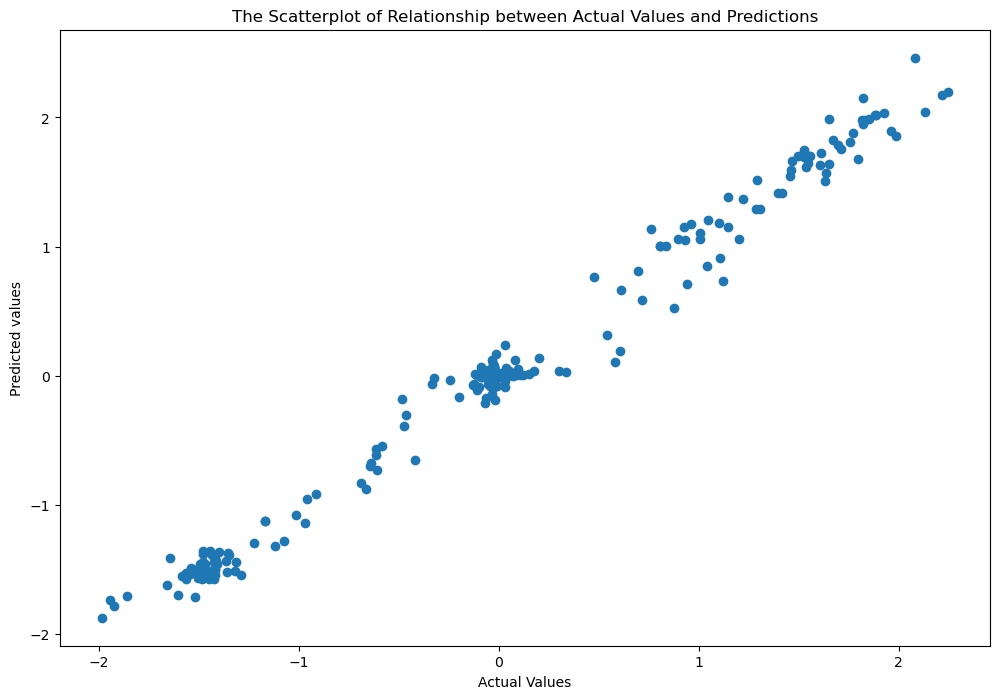

In [62]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(pred_gas['Actual'], pred_gas['Predicted'])